# **Waste Material Segregation for Improving Waste Management**

Coded By Amaan Shaikh

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

Coded By Amaan Shaikh

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Versions check (optional, for debugging)
import numpy
import pandas
import seaborn
import matplotlib
import PIL
import keras
import sklearn

print("numpy version:", numpy.__version__)
print("pandas version:", pandas.__version__)
print("seaborn version:", seaborn.__version__)
print("matplotlib version:", matplotlib.__version__)
print("PIL version:", PIL.__version__)
print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)
print("sklearn version:", sklearn.__version__)

numpy version: 2.2.4
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib version: 3.10.0
PIL version: 11.0.0
tensorflow version: 2.19.0
keras version: 3.8.0
sklearn version: 1.6.1


Load the dataset.

In [3]:
# Load and unzip the dataset
# If the dataset is provided as a ZIP file, use the following code
# NOTE: Update the path if needed based on where your dataset zip is

zip_path = 'data.zip'  # Replace with actual path if different
extract_path = ''  # Folder to extract files into

if not os.path.exists('data'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print(f"Dataset extracted to: {extract_path}")
else:
    print(f"Dataset already extracted at: {extract_path}")

extract_path = 'data'
# List categories (assuming each class has a folder)
class_names = os.listdir(extract_path)
print("Detected classes:", class_names)


Dataset already extracted at: 
Detected classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


Coded By Amaan Shaikh

### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [4]:
def load_images_from_folder(folder_path, label):
    """
    Loads all images from a specified folder, resizes them to target_size,
    and returns them along with their corresponding labels.

    Parameters:
        folder_path (str): Path to the folder containing images.
        label (str): Class label for the images in the folder.

    Returns:
        images (list): List of loaded images as numpy arrays.
        labels (list): Corresponding labels for each image.
    """
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path).convert('RGB')
            img_array = np.array(img)

            images.append(img_array)
            labels.append(label)  # <- Use dynamic label passed as argument
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    return images, labels


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [5]:
# Get the images and their labels

# Path to the dataset
dataset_path = extract_path

# Image dimensions
image_size = (256, 256)

# Lists to collect all images and labels
all_images = []
all_labels = []

# Loop through each category folder and load images
for label in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, label)
    
    if os.path.isdir(folder_path):
        print(f"Loading images for class: {label}")
        images, labels = load_images_from_folder(folder_path, label)
        all_images.extend(images)
        all_labels.extend(labels)

print(f"\nTotal images loaded: {len(all_images)}")
print(f"Total labels loaded: {len(all_labels)}")

Loading images for class: Cardboard
Loading images for class: Food_Waste
Loading images for class: Glass
Loading images for class: Metal
Loading images for class: Other
Loading images for class: Paper
Loading images for class: Plastic

Total images loaded: 7625
Total labels loaded: 7625


In [6]:
# Convert lists to numpy arrays
X = np.array(all_images)
y = np.array(all_labels)

print("Image data shape:", X.shape)
print("Labels shape:", y.shape)

Image data shape: (7625, 256, 256, 3)
Labels shape: (7625,)


Encoded labels shape: (7625, 7)
Class indices mapping: {np.str_('Cardboard'): np.int64(0), np.str_('Food_Waste'): np.int64(1), np.str_('Glass'): np.int64(2), np.str_('Metal'): np.int64(3), np.str_('Other'): np.int64(4), np.str_('Paper'): np.int64(5), np.str_('Plastic'): np.int64(6)}


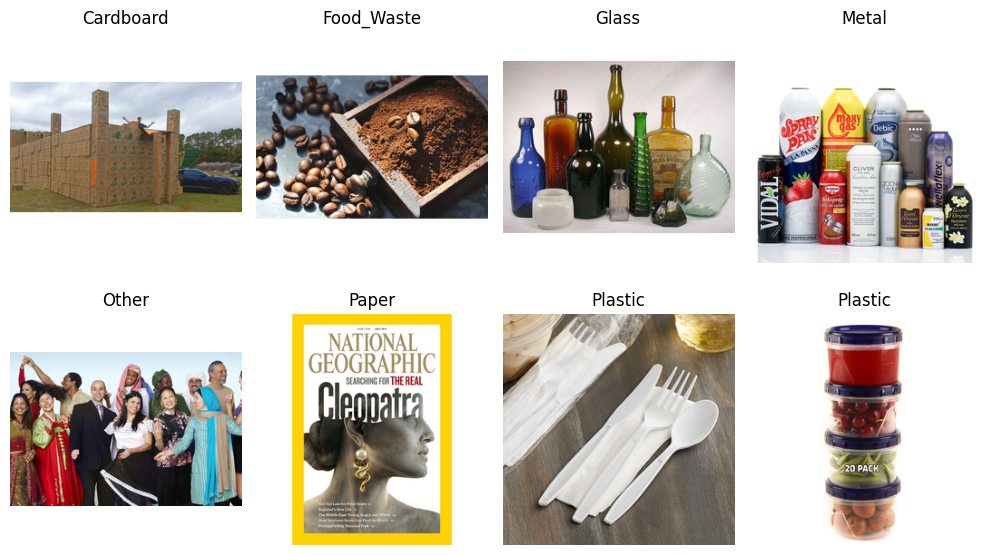

In [7]:
# Encode text labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the labels
y_onehot = to_categorical(y_encoded)

print("Encoded labels shape:", y_onehot.shape)
print("Class indices mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

visited = []
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    for i, t in enumerate(y):
        if t not in visited:
            break
    plt.imshow(X[i])
    plt.title(y[i])  # should now show different labels like 'Glass', 'Metal', etc.
    plt.axis('off')
    visited.append(y[i])
plt.tight_layout()
plt.show()

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

C:\Users\outsi\AppData\Local\Temp\ipykernel_17036\2506847605.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_series, order=label_series.value_counts().index, palette="Set2")


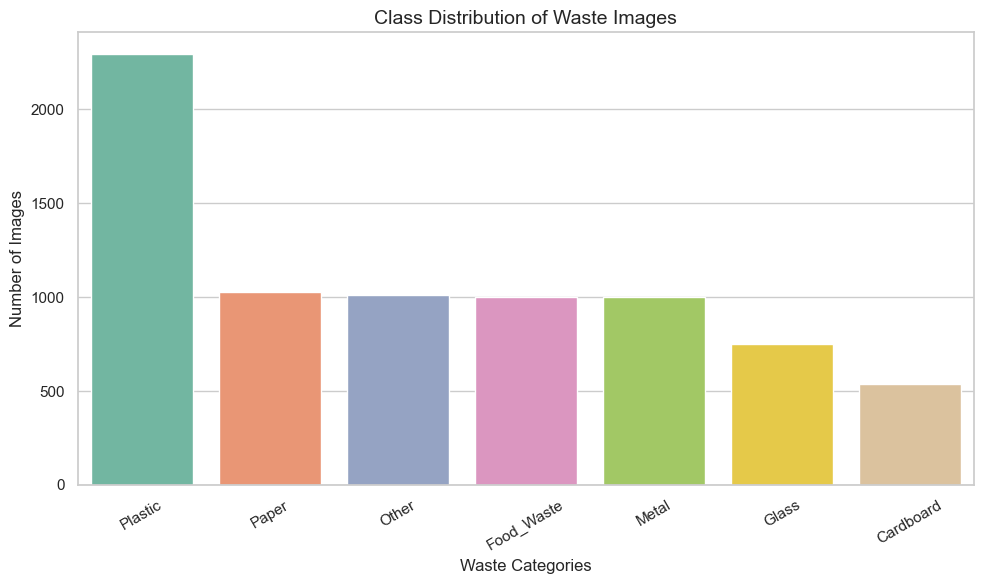

In [8]:
# Visualise Data Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Convert label list `y` to a pandas Series for easy plotting
import pandas as pd
label_series = pd.Series(y)

# Set the style
sns.set(style="whitegrid")

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=label_series, order=label_series.value_counts().index, palette="Set2")

# Add labels and title
plt.title("Class Distribution of Waste Images", fontsize=14)
plt.xlabel("Waste Categories", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

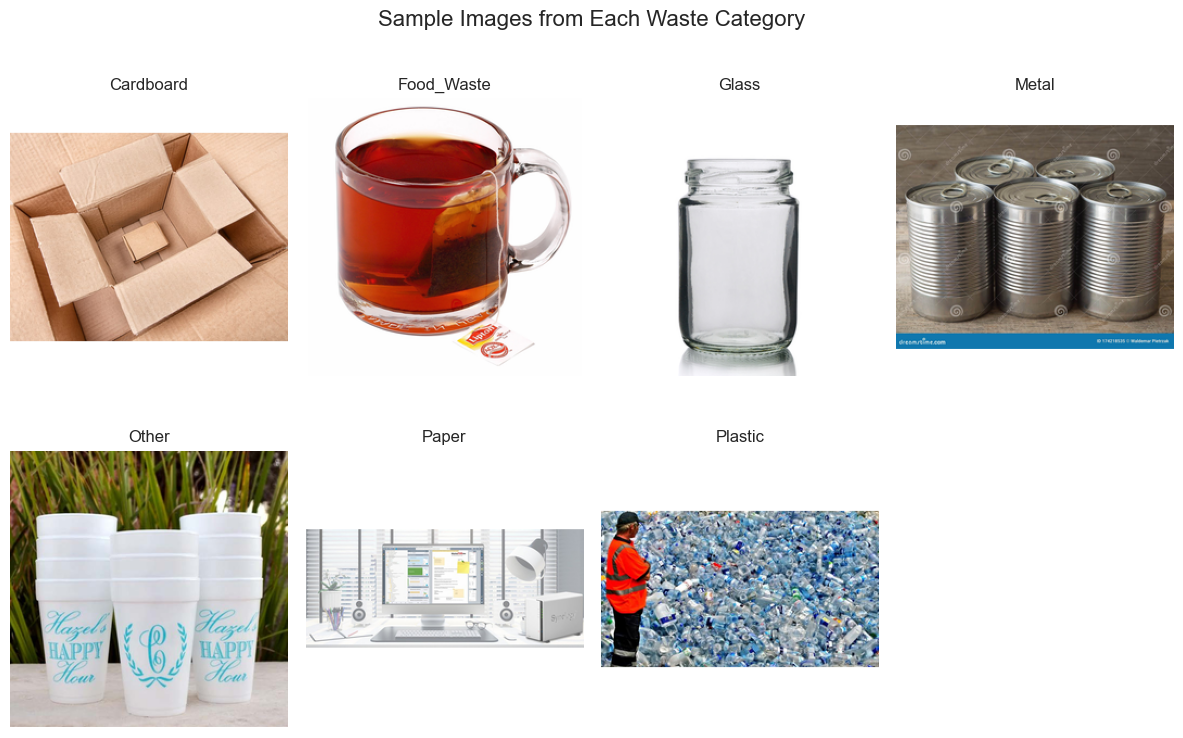

In [9]:
# Visualise Sample Images (across different labels)
import random

# Get the unique class labels
unique_labels = np.unique(y)

# Set figure size
plt.figure(figsize=(12, 8))

# Show one random image from each class
for idx, label in enumerate(unique_labels):
    # Get indices of all images of the current class
    class_indices = np.where(y == label)[0]
    # Pick a random index
    random_index = random.choice(class_indices)
    
    # Plot the image
    plt.subplot(2, 4, idx + 1)
    plt.imshow(X[random_index])
    plt.title(label)
    plt.axis('off')

plt.suptitle("Sample Images from Each Waste Category", fontsize=16)
plt.tight_layout()
plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [10]:
# Find the smallest and largest image dimensions from the data set
min_height, min_width = float('inf'), float('inf')
max_height, max_width = 0, 0

# Loop through all images again (raw files)
for label in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, label)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(img_path)
                width, height = img.size

                # Update min and max dimensions
                min_width = min(min_width, width)
                min_height = min(min_height, height)
                max_width = max(max_width, width)
                max_height = max(max_height, height)
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

print(f"Smallest dimensions: {min_width}x{min_height}")
print(f"Largest dimensions: {max_width}x{max_height}")


Smallest dimensions: 256x256
Largest dimensions: 256x256


In [11]:
# Resize the image dimensions
from tensorflow.keras.preprocessing.image import img_to_array

# Define the target size
target_size = image_size

# Reprocess all images to ensure consistency
X_resized = []

for img_array in X:
    img = Image.fromarray(img_array).resize(target_size)
    img = img_to_array(img)  # Convert back to array format
    X_resized.append(img)

# Convert list to numpy array
X_resized = np.array(X_resized)

print(f"Image dataset shape after resizing: {X_resized.shape}")


Image dataset shape after resizing: (7625, 256, 256, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [12]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Label encode the text labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts class names to integers

# Step 2: One-hot encode the integer labels
y_one_hot = to_categorical(y_encoded)

# Print mapping for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)
print("Shape of one-hot encoded labels:", y_one_hot.shape)


Label mapping: {np.str_('Cardboard'): np.int64(0), np.str_('Food_Waste'): np.int64(1), np.str_('Glass'): np.int64(2), np.str_('Metal'): np.int64(3), np.str_('Other'): np.int64(4), np.str_('Paper'): np.int64(5), np.str_('Plastic'): np.int64(6)}
Shape of one-hot encoded labels: (7625, 7)


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [13]:
# Assign specified parts of the dataset to train and validation sets
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_resized, y_one_hot, test_size=0.2, random_state=18, stratify=y_encoded)

# Print the shapes of the resulting sets to verify the split
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)


Training set shape: (6100, 256, 256, 3)
Validation set shape: (1525, 256, 256, 3)
Training labels shape: (6100, 7)
Validation labels shape: (1525, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

Coded By Amaan Shaikh

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [14]:
# Build and compile the model
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Build the CNN model
def build_cnn_model(input_shape=(256, 256, 3), num_classes=7):
    model = models.Sequential()
    
    # 1st Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    # 2nd Convolutional Layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    # 3rd Convolutional Layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.4))
    
    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Build the model
model = build_cnn_model(input_shape=(*target_size, 3))

# Print the summary of the model
model.summary()


c:\Users\outsi\miniforge3\envs\aiml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,619,399 (112.99 MB)

 Trainable params: 29,618,951 (112.99 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

c:\Users\outsi\miniforge3\envs\aiml\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
AttributeError: module 'ml_dtypes' has no attribute 'float4_e2m1fn'
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2482 - loss: 8.5537
Epoch 1: val_loss improved from inf to 10.78755, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 641s 5s/step - accuracy: 0.2484 - loss: 8.5216 - val_accuracy: 0.2748 - val_loss: 10.7875 - learning_rate: 0.0010
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3030 - loss: 1.8881
Epoch 2: val_loss improved from 10.78755 to 2.21045, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 626s 5s/step - accuracy: 0.3031 - loss: 1.8880 - val_accuracy: 0.1974 - val_loss: 2.2104 - learning_rate: 0.0010
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3182 - loss: 1.8136
Epoch 3: val_loss improved from 2.21045 to 1.98917, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 625s 5s/step - accuracy: 0.3182 - loss: 1.8136 - val_accuracy: 0.2544 - val_loss: 1.9892 - learning_rate: 0.0010
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3173 - loss: 1.7638
Epoch 4: val_loss improved from 1.98917 to 1.77527, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 616s 5s/step - accuracy: 0.3173 - loss: 1.7637 - val_accuracy: 0.3187 - val_loss: 1.7753 - learning_rate: 0.0010
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3218 - loss: 1.7563
Epoch 5: val_loss did not improve from 1.77527
122/122 ━━━━━━━━━━━━━━━━━━━━ 619s 5s/step - accuracy: 0.3217 - loss: 1.7563 - val_accuracy: 0.3128 - val_loss: 1.8470 - learning_rate: 0.0010
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3258 - loss: 1.6983
Epoch 6: val_loss improved from 1.77527 to 1.69299, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 625s 5s/step - accuracy: 0.3259 - loss: 1.6982 - val_accuracy: 0.3410 - val_loss: 1.6930 - learning_rate: 0.0010
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3549 - loss: 1.6254
Epoch 7: val_loss improved from 1.69299 to 1.60589, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 618s 5s/step - accuracy: 0.3550 - loss: 1.6253 - val_accuracy: 0.3875 - val_loss: 1.6059 - learning_rate: 0.0010
Epoch 8/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3708 - loss: 1.5817
Epoch 8: val_loss did not improve from 1.60589
122/122 ━━━━━━━━━━━━━━━━━━━━ 617s 5s/step - accuracy: 0.3709 - loss: 1.5815 - val_accuracy: 0.3751 - val_loss: 1.7311 - learning_rate: 0.0010
Epoch 9/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3943 - loss: 1.5191
Epoch 9: val_loss improved from 1.60589 to 1.51854, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 624s 5s/step - accuracy: 0.3942 - loss: 1.5193 - val_accuracy: 0.4125 - val_loss: 1.5185 - learning_rate: 0.0010
Epoch 10/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3992 - loss: 1.4981
Epoch 10: val_loss did not improve from 1.51854
122/122 ━━━━━━━━━━━━━━━━━━━━ 602s 5s/step - accuracy: 0.3992 - loss: 1.4982 - val_accuracy: 0.3941 - val_loss: 2.4685 - learning_rate: 0.0010
Epoch 11/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4167 - loss: 1.4531
Epoch 11: val_loss did not improve from 1.51854
122/122 ━━━━━━━━━━━━━━━━━━━━ 603s 5s/step - accuracy: 0.4167 - loss: 1.4529 - val_accuracy: 0.3698 - val_loss: 2.8042 - learning_rate: 0.0010
Epoch 12/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4128 - loss: 1.4089
Epoch 12: val_loss did not improve from 1.51854
122/122 ━━━━━━━━━━━━━━━━━━━━ 591s 5s/step - accuracy: 0.4129 - loss: 1.4088 - val_accuracy: 0.4059 - val_loss: 1.7980 - learning_rate: 0.0010
Epoch 13/25
122/122 ━━━━━━━━━━

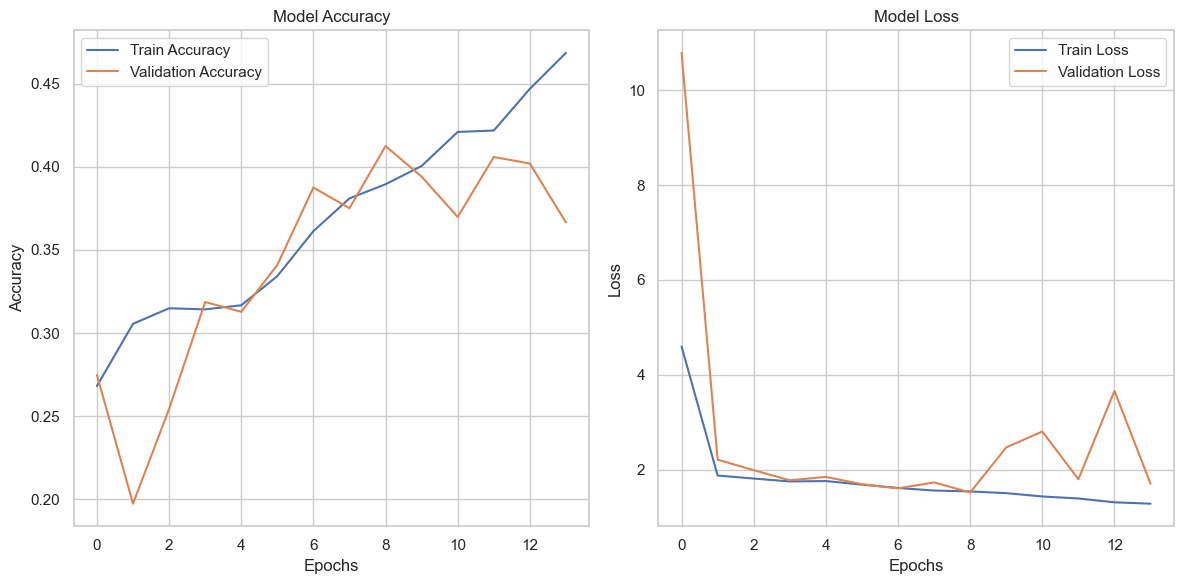

In [15]:
# Training
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Set up ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255.0)
val_datagen = ImageDataGenerator(rescale=1./255.0)

# Assuming X_train, y_train, X_val, y_val, and model are already defined
# Create data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=50)
val_generator = val_datagen.flow(X_val, y_val, batch_size=50)

# Train the model using the data generators
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

# Plot the training and validation loss and accuracy over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
display(history.history)

{'accuracy': [0.2681967318058014,
  0.3055737614631653,
  0.31491804122924805,
  0.3142623007297516,
  0.3167213201522827,
  0.33426228165626526,
  0.3613114655017853,
  0.3809836208820343,
  0.3895081877708435,
  0.4004918038845062,
  0.42098361253738403,
  0.4218032658100128,
  0.44688525795936584,
  0.46852460503578186],
 'loss': [4.597012519836426,
  1.8757318258285522,
  1.812423825263977,
  1.7514398097991943,
  1.7595152854919434,
  1.6839330196380615,
  1.613731861114502,
  1.5594210624694824,
  1.5412918329238892,
  1.5047539472579956,
  1.4343961477279663,
  1.3918519020080566,
  1.311665415763855,
  1.281978726387024],
 'val_accuracy': [0.2747541069984436,
  0.1973770558834076,
  0.2544262409210205,
  0.3186885118484497,
  0.31278687715530396,
  0.3409835994243622,
  0.3875409960746765,
  0.37508195638656616,
  0.41245901584625244,
  0.3940983712673187,
  0.36983606219291687,
  0.40590164065361023,
  0.40196722745895386,
  0.36655738949775696],
 'val_loss': [10.7875490188598

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 440ms/step - accuracy: 0.3142 - loss: 468.3109
Test Loss: 466.6949
Test Accuracy: 0.3016
48/48 ━━━━━━━━━━━━━━━━━━━━ 19s 385ms/step

Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.00      0.00      0.00       108
  Food_Waste       1.00      0.01      0.01       200
       Glass       0.00      0.00      0.00       150
       Metal       0.00      0.00      0.00       200
       Other       0.00      0.00      0.00       202
       Paper       0.50      0.01      0.02       206
     Plastic       0.30      1.00      0.46       459

    accuracy                           0.30      1525
   macro avg       0.26      0.14      0.07      1525
weighted avg       0.29      0.30      0.14      1525



c:\Users\outsi\miniforge3\envs\aiml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\outsi\miniforge3\envs\aiml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\outsi\miniforge3\envs\aiml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


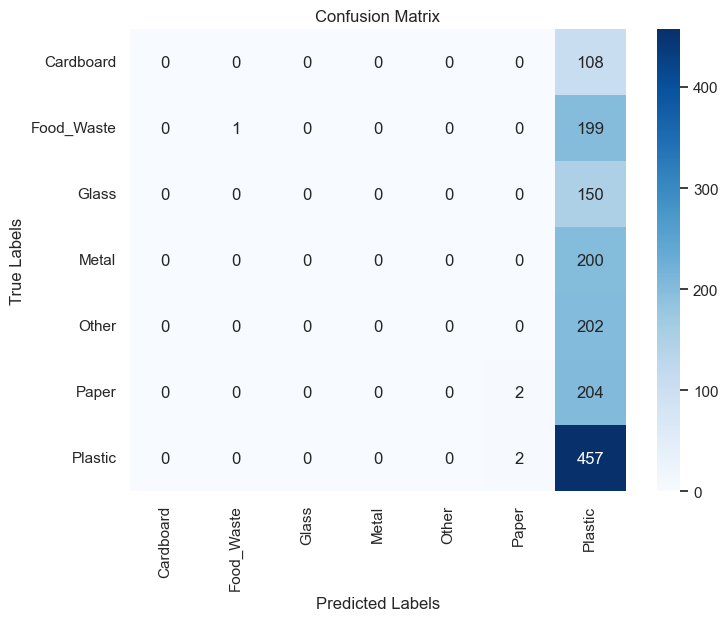

In [16]:
# Evaluate on the test set; display suitable metrics
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=1)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict the labels for the test set
y_pred = model.predict(X_val)

# Convert predictions and true labels back to class labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class labels
y_true_classes = np.argmax(y_val, axis=1)  # True class labels

# Print a classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [26]:
"xticklabels=",class_names, "yticklabels=",class_names

('xticklabels=',
 ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic'],
 'yticklabels=',
 ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic'])

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [17]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [18]:
# Create a function to augment the images


##### **4.1.2**

Train the model on the new augmented dataset.

In [19]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

Coded By Amaan Shaikh

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

#### 🧠 Current Situation Summary
Dataset: 7 classes of waste (e.g., Plastic, Cardboard, etc.)

Total images: 7625 (after resizing to 256x256x3)

Imbalanced dataset: Class counts range from 540 (Cardboard) to 2295 (Plastic)

Model architecture: CNN with 3 Conv2D layers, BatchNorm, Dropouts, Flatten, Dense layers

Training:

accuracy capped at ~47% (best epoch 14)

val_accuracy peaked at ~41%

val_loss increased after Epoch 9

Issue: Model is overfitting + slow training + accuracy plateauing

#### ⚠️ Issues Identified
Overfitting: Training accuracy keeps increasing while validation accuracy plateaus or drops.

Imbalanced classes: Plastic is overrepresented; Cardboard is underrepresented.

Training time: ~10 minutes per epoch = ~2+ hours total. That’s huge!

Old Keras warning: You're using the .h5 format which is considered legacy.

Error at beginning: ml_dtypes.float4_e2m1fn – this looks like an internal library issue. Could be TensorFlow-related.

#### ✅ What’s Working Well
The model structure is a good starting point.

Normalization and Dropout layers are in place.

Learning rate scheduler (ReduceLROnPlateau) is used.

EarlyStopping is implemented.

Logging metrics and saving best model weights. Nice!

